In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
import torch
from LinearRegression import LinearRegression
plt.style.use("dark_background")

In [2]:
X,y=datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=1234)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

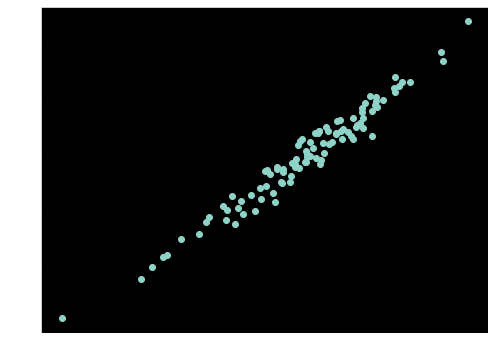

In [3]:
fig=plt.figure(figsize=(8,6))
plt.scatter(X[:,0],y)
plt.show()

In [4]:
from lightphe import LightPHE

In [5]:
cs=LightPHE(algorithm_name="Paillier")

In [6]:
enc_X_train_rows=[]
for i in X_train:
    i=list(i)
    pt=cs.encrypt(i)
    enc_X_train_rows.append(pt)

In [7]:
len(enc_X_train_rows)

80

In [8]:
X_train_cols=X_train[:,0]

In [9]:
X_train_cols=list(X_train_cols)
X_train_cols

[0.036141936684072715,
 0.9849198419098969,
 0.018289191349219306,
 -0.12209157484767426,
 0.2152685809694434,
 -1.1909756947064645,
 -0.3126518960917129,
 0.5657383060625951,
 2.0078429507780005,
 0.30796885521603423,
 1.150035724719818,
 1.3919861934464073,
 -0.2026463246291819,
 0.16452954293239852,
 -0.9742363337673154,
 0.0395126866933667,
 0.6319794458091295,
 1.0459382556276653,
 0.21188338677770105,
 -3.5635166606247353,
 0.7673687357524115,
 1.4327069684260973,
 0.19342137647035826,
 1.0589691875711504,
 -2.4004536338122957,
 -0.5482424491868549,
 2.390960515463033,
 0.015696372114428918,
 -0.20849876310587975,
 0.405453411570191,
 -0.14461950836938436,
 -2.0212548201949705,
 -0.3999645806965225,
 0.8637172916848387,
 0.35402033219923795,
 -0.08194705182666534,
 0.5235079678938094,
 -0.4693052847058996,
 -0.5118813091268151,
 -1.5469055532292402,
 1.5456588046255575,
 1.3181515541801367,
 -0.5664459304649568,
 2.0306036208387996,
 -0.3978402281999914,
 -0.5847182112607883,
 -0

In [10]:
enc_X_train_cols=cs.encrypt(X_train_cols)

In [11]:
enc_X_train_cols

Fraction(+1780099912953401556546823345910780724803607236336811370854506739619983206795244153336563969147796268661759504748779822682737823153439722683859163390968928958976487260377660349952059812141140690930346059415883144414617920653010798920865357673579585822597726727428107485932459370701680278034800150554801080535887089117690273216002641527192842132219377138935036122945450852425926705928907505109834373300522032048450551756650569748790762733050154327723411966677130008787890016796531144680909592794122179252871405997025141107547796624399522528268442524307930616678177789516747182991258217286886853846881137542223532207332 / 42109127624839267680424641141207954209162746834407791562206114075597348410968739580090258170647152813237479341414740041134755694975715934996363241439949073446778344807266462646205695902339942870741958093065286313677506814080218669134017432236953203157647335267363969296531953591543129429871935809527721015432530260650069745995148561431424435480115649798363371292322977665

In [12]:
y_train_list=list(y_train)
enc_y_train=cs.encrypt(y_train_list)
enc_y_train

Fraction(+1737542579959426107318101953984996180203693597997276856694622522510506910710760217448437157662529459497508686834357106034806447325566282299500315899326663463493938897979641892655115818017766119471678117655286544615770660370325059270354577760148641689042021343051420530781504247179904380111954129344361965863971399464185200443158912511014120007037819522262119249662662227475798640692133098128333133462178864785289942630557719425977933790132473170815984218924678283242597421869073104105404454006772448843016664074195447910597141001194713019646996543778172513313103890256039388342520492032370563625699048488909455804071 / 61944245720264621899866490195984917215310528762969084032599304576288567501720672699493968957519748507873549094338801501564250880927758103978727290454358014454433776477024081008709506840955621893124419720646992560671553187091941754492215379240785159564738666432983636458810093596599189788514473640607144827946472643646754501787635345459891324693928005089954599289087915002

In [13]:
y_test_list=list(y_test)
enc_y_test=cs.encrypt(y_test_list)
enc_y_test

Fraction(-1726569502508406082127922426508398550583298127306176405859967363098985021882752077396439048645118615881395076670272934192546458395772685376167757591878995305868605055543423479612943318907557279961064953948231873738420645813869741180340101363733512288880482175056501840643030066427530524831083448513785228341378178640317379956583359804470938490849245096018500537957764523872883688555263362953610050598930019718339504266711109600619755521524181904775021935285824769370155558799726416171585883795576211029194883462761569314692309006977866070922835201491613172275414615368165792826571387648124407320630469551901592824641 / 19331270655439315536747745482934228433044944143700669304860393829966836372108296178335532451959730287697425334359075801485850427936463152542476113187450287913457459898401290120775923232922065746639673942862323740275793291161718546239685254399166258043796503432346132360178009268938755298171954628747640071626854356593253899046516164677866135605426833956515006039561937956

### fit function:

In [14]:
n_samples,n_features=X_train.shape
print(n_samples,n_features)

80 1


In [15]:
bias=0
var1=1/n_samples
n_iters=1000
lr=0.01
# weights as scalars:
w_a1=0

In [16]:
dot_prod=enc_X_train_cols*w_a1
dot_prod

Fraction(+1 / 421091276248392676804246411412079542091627468344077915622061140755973484109687395800902581706471528132374793414147400411347556949757159349963632414399490734467783448072664626462056959023399428707419580930652863136775068140802186691340174322369532031576473352673639692965319535915431294298719358095277210154325302606500697459951485614314244354801156497983633712923229776655307971651895593119956834219343508563214559372174239879267204074420654682086929536561168730029917912651070920729801973573290403388423452880332008149658131644583306077898231320956881731408398374165711301873763737904268497020083856395410414185971), Fraction(+1 / 175758028236350931805430847865272280055928713745954031222555722542107902337101667133992315119047932392324206684333585532462594649279411562661999960746931557868322912308922962506938864437642473007472645235394664734544960836914534097541556413962890413032415460334031581395782225540690856423122138065975318273224126779012767523835522669766565882838483520720

In [17]:
bias_counts=[bias]*n_samples
bias_counts=cs.encrypt(bias_counts)

In [18]:
y_pred=dot_prod+bias_counts

In [19]:
test=cs.decrypt(y_pred)
test

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [20]:
y_train

array([   4.72571035,   37.3033147 ,    9.84617977,   -4.74696202,
         46.61433976,  -88.5636594 ,  -23.05085118,   49.30980232,
        187.11855381,   52.7868072 ,  100.63781242,  126.59136522,
        -34.92302734,   -2.39500665,  -91.54741375,   -1.32075177,
         44.66438206,  107.23095944,   45.28549362, -289.12699629,
         57.29982392,  132.7901884 ,   41.80672108,   88.76973989,
       -218.53325548,  -24.66035565,  241.89951823,  -10.13240956,
        -46.42718117,   25.64618465,  -13.50142554, -176.72441073,
        -18.66943338,   50.5672884 ,   22.64343207,  -21.09022538,
         64.92081242,  -64.87115989,  -31.48631679, -138.96811403,
        133.52911687,  122.17927892,  -53.50531413,  171.25986261,
        -21.98254439,  -26.36081393,   20.50476935,  -10.68145433,
         42.95199809,   24.1455885 , -179.69097653,  -69.72153699,
       -147.48591272,  -96.71683373,   37.07750059,   68.80268857,
        -18.61172071,   79.62314161,   52.56456985,   28.51154

In [21]:
def res_sum_fun(l):
    p=cs.decrypt(l)
    summation=0
    for i in p:
        summation+=i
    return summation

In [22]:
# res_sum=res_sum_fun(res)
# res_sum

In [23]:
# t=cs.decrypt(res)
# t

In [24]:
enc_y_train_nve=enc_y_train*(-1)
test2=cs.decrypt(enc_y_train_nve)
test2

[-4.72571,
 -37.30331,
 -9.84617,
 4.74696,
 -46.61433,
 88.56365,
 23.05085,
 -49.3098,
 -187.11855,
 -52.7868,
 -100.63781,
 -126.59136,
 34.92302,
 2.395,
 91.54741,
 1.32075,
 -44.66438,
 -107.23095,
 -45.28549,
 289.12699,
 -57.29982,
 -132.79018,
 -41.80672,
 -88.76973,
 218.53325,
 24.66035,
 -241.89951,
 10.1324,
 46.42718,
 -25.64618,
 13.50142,
 176.72441,
 18.66943,
 -50.56728,
 -22.64343,
 21.09022,
 -64.92081,
 64.87115,
 31.48631,
 138.96811,
 -133.52911,
 -122.17927,
 53.50531,
 -171.25986,
 21.98254,
 26.36081,
 -20.50476,
 10.68145,
 -42.95199,
 -24.14558,
 179.69097,
 69.72153,
 147.48591,
 96.71683,
 -37.0775,
 -68.80268,
 18.61172,
 -79.62314,
 -52.56456,
 -28.51154,
 -107.68399,
 -31.8954,
 11.76894,
 -44.86892,
 113.47899,
 46.81999,
 -0.28974,
 -45.4332,
 -60.44072,
 13.86033,
 27.30975,
 117.65626,
 121.49964,
 -40.21308,
 95.50351,
 80.54746,
 -99.41132,
 71.52561,
 -115.32489,
 56.87386]

In [25]:
res=y_pred+enc_y_train_nve
test3=cs.decrypt(res)
test3

[4.72571,
 37.30331,
 9.84617,
 4.617717615596546e+302,
 46.61433,
 4.617717615596546e+302,
 4.617717615596546e+302,
 49.3098,
 187.11855,
 52.7868,
 100.63781,
 126.59136,
 4.617717615596546e+302,
 4.617717615596546e+302,
 4.617717615596546e+302,
 4.617717615596546e+302,
 44.66438,
 107.23095,
 45.28549,
 4.617717615596546e+302,
 57.29982,
 132.79018,
 41.80672,
 88.76973,
 4.617717615596546e+302,
 4.617717615596546e+302,
 241.89951,
 4.617717615596546e+302,
 4.617717615596546e+302,
 25.64618,
 4.617717615596546e+302,
 4.617717615596546e+302,
 4.617717615596546e+302,
 50.56728,
 22.64343,
 4.617717615596546e+302,
 64.92081,
 4.617717615596546e+302,
 4.617717615596546e+302,
 4.617717615596546e+302,
 133.52911,
 122.17927,
 4.617717615596546e+302,
 171.25986,
 4.617717615596546e+302,
 4.617717615596546e+302,
 20.50476,
 4.617717615596546e+302,
 42.95199,
 24.14558,
 4.617717615596546e+302,
 4.617717615596546e+302,
 4.617717615596546e+302,
 4.617717615596546e+302,
 37.0775,
 68.80268,
 4

### ERROR ZONE:

In [26]:
a=[-1,-2,-3,-4,-5]
r=cs.encrypt(a)
s=cs.decrypt(r)
s

[-1.0, -2.0, -3.0, -4.0, -5.0]

In [27]:
u=[10,10,20,30,40]
v=cs.encrypt(u)
x=r*(-1)
w=v+x
cs.decrypt(w)

[9.0, 8.0, 17.0, 26.0, 35.0]

In [28]:
cs.decrypt(r)

[-1.0, -2.0, -3.0, -4.0, -5.0]

In [29]:
w1=r+v

In [30]:
cs.decrypt(w1)

[9.0, 8.0, 17.0, 26.0, 35.0]

In [31]:
p1=[-10000]
p1=cs.encrypt(p1)

p2=[1000]
p2=cs.encrypt(p2)

g=p1+p2
cs.decrypt(g)

[4.617717615618644e+302]

### A failed try

In [32]:
p1=[-100]
p1=cs.encrypt(p1)

p2=[1]
p2=cs.encrypt(p2)

g=p1+p2
cs.decrypt(g)

[4.617717615618644e+302]

In [33]:
p1=[-50]
p1=cs.encrypt(p1)

p2=[1]
p2=cs.encrypt(p2)

g=p1+p2
cs.decrypt(g)

[4.617717615618644e+302]

In [34]:
p1=[-10]
p1=cs.encrypt(p1)

p2=[1]
p2=cs.encrypt(p2)

g=p1+p2
cs.decrypt(g)

[4.617717615618644e+302]

In [35]:
q1=[-100]
q1=cs.encrypt(q1)

q2=[1]
q2=cs.encrypt(q2)

ss=q1+q2
cs.decrypt(ss)

[4.617717615618644e+302]